In [4]:
import numpy as np
import pandas as pd
 
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.externals import joblib 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import xgboost as xgb
from lightgbm import LGBMRegressor
import math
%matplotlib inline

In [6]:
pd.set_option('display.max_colwidth',1000)
#pd.set_option('display.height',1000)
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)
pd.set_option('display.width',1000)

In [8]:
train_data = pd.read_csv('../data/public.train.csv')
test_data = pd.read_csv('../data/public.test.csv')
submit = pd.read_csv('../data/submit_example.csv') 

In [9]:
train_data.describe()

,ID,板温,现场温度,光照强度,转换效率,转换效率A,转换效率B,转换效率C,电压A,电压B,电压C,电流A,电流B,电流C,功率A,功率B,功率C,平均功率,风速,风向,发电量
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,9062.866444,6.703914,-0.629456,339.890222,64.077781,52.906926,84.416487,54.909988,717.852444,722.317556,700.171889,4.124878,4.647638,4.633024,3118.110127,3168.251196,3057.906246,3114.755833,2.356078,221.298556,5.695245
std,5114.232566,11.742366,67.430126,220.132765,807.424850,606.060373,2191.630414,705.950654,1931.338424,2048.559736,1674.291659,2.570927,18.083549,16.656423,13715.886085,14213.778780,11674.064480,7754.250793,1.629720,97.887963,3.463744
min,10.000000,-24.790000,-6321.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.125144
25%,4682.750000,-1.870000,-7.600000,153.000000,20.510000,20.460000,20.280000,20.580000,641.000000,638.000000,638.000000,1.740000,1.710000,1.800000,1192.230000,1159.305000,1223.982500,1219.855000,1.200000,152.000000,2.512812
50%,9083.500000,5.640000,-2.400000,314.000000,25.230000,25.020000,25.015000,25.390000,669.000000,666.000000,666.000000,4.050000,4.120000,4.110000,2730.210000,2774.940000,2768.760000,2762.200000,2.200000,269.000000,5.769032
75%,13470.000000,15.620000,8.100000,526.000000,37.190000,36.532500,36.972500,36.885000,689.000000,686.000000,686.000000,6.482500,6.530000,6.600000,4263.307500,4267.297500,4329.490000,4278.105000,3.300000,283.000000,8.896220
max,17876.000000,36.490000,78.700000,941.000000,60856.240000,27472.310000,178911.990000,41632.210000,65515.000000,65512.000000,65470.000000,9.430000,652.020000,647.620000,470096.580000,465945.500000,469844.840000,160151.370000,19.300000,672.000000,12.288756


In [10]:
test_data.describe()

,ID,板温,现场温度,光照强度,转换效率,转换效率A,转换效率B,转换效率C,电压A,电压B,电压C,电流A,电流B,电流C,功率A,功率B,功率C,平均功率,风速,风向
count,8409.000000,8409.000000,8409.000000,8409.000000,8409.000000,8409.000000,8409.000000,8409.000000,8409.000000,8409.000000,8409.000000,8409.000000,8409.000000,8409.000000,8409.000000,8409.000000,8409.000000,8409.000000,8409.000000,8409.000000
mean,9134.017362,6.743565,-0.532370,340.494232,67.180684,61.592292,71.052603,68.897216,692.506243,759.009989,712.268284,4.120589,4.457701,4.903527,2891.299515,3396.516889,3131.409281,3139.741955,2.391366,223.006422
std,5135.024213,11.733794,70.730474,220.139546,927.594047,2022.687363,1311.881379,1350.963592,1413.713947,2545.796157,1870.362932,2.570118,14.264229,21.105298,8837.131405,17642.610316,12662.028495,7941.118597,1.646400,96.326689
min,1.000000,-23.890000,-6414.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4732.000000,-1.790000,-7.500000,155.000000,20.400000,20.380000,20.220000,20.530000,641.000000,638.000000,637.000000,1.740000,1.750000,1.810000,1181.040000,1176.600000,1233.690000,1225.620000,1.200000,167.000000
50%,9262.000000,5.560000,-2.300000,312.000000,25.060000,24.770000,24.800000,25.380000,668.000000,666.000000,666.000000,4.040000,4.130000,4.100000,2710.500000,2762.540000,2756.000000,2739.600000,2.200000,269.000000
75%,13576.000000,15.470000,8.300000,529.000000,36.960000,36.060000,36.630000,36.930000,689.000000,686.000000,686.000000,6.470000,6.530000,6.610000,4245.750000,4262.500000,4324.900000,4268.160000,3.300000,283.000000
max,17875.000000,36.800000,54.500000,934.000000,61448.540000,183289.380000,86857.130000,77396.680000,65477.000000,65508.000000,65514.000000,9.570000,653.710000,652.040000,453360.600000,603301.050000,458325.000000,202906.540000,25.200000,619.000000


In [11]:
# print(test_data[test_data['现场温度'] < -274])
# print('\n',train_data[train_data['现场温度'] < -274])
# print('\n',test_data['风向'][test_data['风向'] > 360])
# print('\n',train_data['风向'][train_data['风向'] > 360])
# len(np.unique(test_data['风向']))

In [12]:
def drop_col(df, col_name):
    return df.drop([col_name], axis=1)

# def drop_outlayer(df):
#     df.drop(df[df['发电量'] < 0].index, inplace=True)
#     df.drop(df[df['现场温度'] < -268].index, inplace=True)
#     df.drop(df[df['转换效率'] > 20000].index, inplace=True)
#     df.drop(df[df['转换效率'] < 0].index, inplace=True)
#     df.drop(df[df['风向'] > 360].index, inplace=True)
#     return df

In [13]:
# train_data = drop_outlayer(train_data)

# train_data = drop_col(train_data, '平均功率')
# train_data = drop_col(train_data, '转换效率')
# test_data = drop_col(test_data, '平均功率')
# test_data = drop_col(test_data, '转换效率')
# train_data = drop_col(train_data, '风速')
# test_data = drop_col(test_data, '风速')

### 去除重复值

In [14]:
train_data.drop_duplicates(train_data.columns.drop('ID'), keep='first', inplace=True)

### 处理缺失值

#### 1. 平均值、众数替换

In [15]:
def process_missing_value(df, feature, mode='mean'):
    if mode.lower() == 'mean':
        df[feature].loc[(df[feature] == 0) | (df[feature] == 0.)] = df[feature].mean()
    elif model.lower() == 'mode':
        df[feature].loc[(df[feature] == 0) | (df[feature] == 0.)] = df[feature].mode()
    return df

In [16]:
def col_missing_count(df, feature):
    return df[feature][(df[feature] == 0.) | (df[feature] == 0)].count()

def show_all_missing_value(df, process=False, mode='mean'): 
    missing_count = {}
    for f in df.columns.drop(['ID']):
        missing_count[f] = [col_missing_count(df, f)]

    missing = pd.DataFrame(missing_count)
    if process:
        for f in df.columns.drop(['ID']):
            df = process_missing_value(df, f, mode=mode)
    return missing

In [17]:
# show_all_missing_value(train_data, process=True)

In [18]:
# show_all_missing_value(train_data)

#### 2. 近邻值替换

In [19]:
from sklearn.neighbors import NearestNeighbors
neighbors = NearestNeighbors(metric='cosine', n_jobs=8, algorithm='auto')
neighbors.fit(train_data.drop(['ID', '发电量'], axis=1))

NearestNeighbors(algorithm='auto', leaf_size=30, metric='cosine',
         metric_params=None, n_jobs=8, n_neighbors=5, p=2, radius=1.0)

In [20]:
def process_missing_by_nearest_neighbors(df):
    if '发电量' in df.columns:
        tmp_df = df.drop(['ID', '发电量'], axis=1)
    else:
        tmp_df = df.drop(['ID'], axis=1)
    for idx, line in tmp_df.iterrows():
        if (line[(line == 0) | (line == 0.)].count() > 0):
            col_index = line[(line == 0) | (line == 0.)].index
            n_index = neighbors.kneighbors(line.values.reshape(1, -1))[1][0]
            df.loc[idx, col_index] = np.average(df.loc[n_index.tolist(), col_index].dropna(), axis=0)    
    return df

In [21]:
# trian_data = process_missing_by_nearest_neighbors(train_data)

In [22]:
# test_data = process_missing_by_nearest_neighbors(test_data)

In [23]:
# show_all_missing_value(train_data)

In [24]:
# show_all_missing_value(test_data)

### 数据分布调整（没什么用）

array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'板温'}>,
        <AxesSubplot:title={'center':'现场温度'}>,
        <AxesSubplot:title={'center':'光照强度'}>,
        <AxesSubplot:title={'center':'转换效率'}>],
       [<AxesSubplot:title={'center':'转换效率A'}>,
        <AxesSubplot:title={'center':'转换效率B'}>,
        <AxesSubplot:title={'center':'转换效率C'}>,
        <AxesSubplot:title={'center':'电压A'}>,
        <AxesSubplot:title={'center':'电压B'}>],
       [<AxesSubplot:title={'center':'电压C'}>,
        <AxesSubplot:title={'center':'电流A'}>,
        <AxesSubplot:title={'center':'电流B'}>,
        <AxesSubplot:title={'center':'电流C'}>,
        <AxesSubplot:title={'center':'功率A'}>],
       [<AxesSubplot:title={'center':'功率B'}>,
        <AxesSubplot:title={'center':'功率C'}>,
        <AxesSubplot:title={'center':'平均功率'}>,
        <AxesSubplot:title={'center':'风速'}>,
        <AxesSubplot:title={'center':'风向'}>],
       [<AxesSubplot:title={'center':'发电量'}>, <AxesSubplot:>,
        

/home/jupyter/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 26495 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jupyter/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 28201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jupyter/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 26495 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/jupyter/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 28201 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/jupyter/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 29616 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jupyter/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.

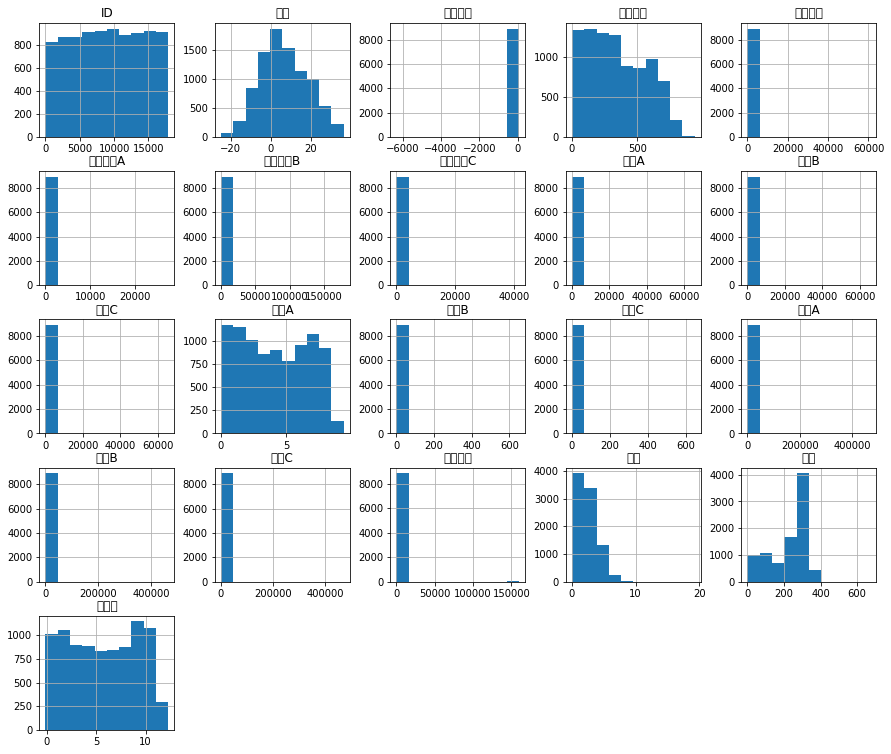

In [25]:
train_data.hist(figsize=(15,13))

In [26]:
train_data.std()

ID        5114.321777
板温          11.774257
现场温度        67.738640
光照强度       218.944451
转换效率       811.108515
转换效率A      608.822482
转换效率B     2201.671023
转换效率C      709.172324
电压A       1939.190689
电压B       2056.995210
电压C       1680.867181
电流A          2.554991
电流B         18.161688
电流C         16.727608
功率A      13775.968549
功率B      14276.168783
功率C      11724.393268
平均功率      7784.811640
风速           1.624018
风向          96.370203
发电量          3.445110
dtype: float64

In [27]:
def process_hugstd_value(df, feature, method='sqrt'):
    if method == 'sqrt':
        df[feature] = df[feature].apply(np.sqrt)
    elif method == 'log':
        df[feature] = df[feature].apply(np.log)
    return df

In [28]:
# train_data = process_hugstd_value(train_data, '转换效率B')
# test_data = process_hugstd_value(test_data, '转换效率B')

# train_data = process_hugstd_value(train_data, '电压A')
# test_data = process_hugstd_value(test_data, '电压A')

In [29]:
# train_data.describe()

### 风向值离散化（没什么用）

In [30]:
def discrete(x):
    if x % 10 >= 5:
        x //= 10
        x *= 10
        x += 10
    else:
        x //= 10
        x *= 10
    return x

In [31]:
# train_data['风向'] = train_data['风向'].apply(discrete)

In [32]:
# train_data['风向'].plot(kind='hist')
# plt.show()

In [33]:
# len(np.unique(train_data['风向']))

### Model: Xgboost, Sklearn_GBDT, RandomForest, LightGBM

In [34]:
def generate_train_data(train_data, test_data, poly=False, select=False):
    y = train_data['发电量']
    X = train_data.drop(['发电量','ID'], axis=1)
    sub_data = test_data.drop(['ID'], axis=1)

    if poly:
        from sklearn.preprocessing import PolynomialFeatures
        poly = PolynomialFeatures(degree=2, interaction_only=True)
        X = poly.fit_transform(X)
        sub_data = poly.transform(sub_data)
        
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

    if select:
        from sklearn.feature_selection import SelectFromModel
        sm = SelectFromModel(GradientBoostingRegressor(random_state=2))
        X_train = sm.fit_transform(X_train, y_train)
        X_test = sm.transform(X_test)
        sub_data = sm.transform(sub_data)
        
    return X_train, X_test, y_train, y_test, sub_data

In [35]:
def cal_score(mse):
    return 1 / (1 + math.sqrt(mse))

In [36]:
X_train, X_test, y_train, y_test, sub_data = generate_train_data(train_data, test_data, poly=True, select=True)
print(X_train.shape, sub_data.shape)

(7134, 10) (8409, 10)


In [37]:
xgbt = xgb.XGBRegressor(n_estimators=200, max_depth=3, random_state=1, n_jobs=8)
gbdt = GradientBoostingRegressor(n_estimators=200, max_depth=3, max_features='log2', random_state=1)
forest = RandomForestRegressor(n_estimators=100, max_features='log2', random_state=1, n_jobs=8)

lgb_params = {}
lgb_params['n_estimators'] = 200
lgb_params['max_depth'] = 3 
lgb_params['random_state'] = 1
lgb = LGBMRegressor(**lgb_params)

In [38]:
def train(X_train, y_train):
    xgbt.fit(X_train, y_train)
    gbdt.fit(X_train, y_train)
    forest.fit(X_train, y_train)
    lgb.fit(X_train, y_train)

def predict(X_test, y_test):
    y_pred_xgb = xgbt.predict(X_test)
    mse_xgb = mean_squared_error(y_test.values, y_pred_xgb)
    
    y_pred_gbdt = gbdt.predict(X_test)
    mse_gbdt = mean_squared_error(y_test.values, y_pred_gbdt)
    
    y_pred_forest = forest.predict(X_test)
    mse_forest = mean_squared_error(y_true=y_test, y_pred=y_pred_forest)
    
    y_pred_lgb = lgb.predict(X_test)
    mse_lgb = mean_squared_error(y_true=y_test, y_pred=y_pred_lgb)
    
    res = pd.DataFrame()
    res['model'] = np.array(['XGBoost', 'Sklearn_GBDT', 'RandomForest', 'LightGBM'])
    res['mse'] = np.array([mse_xgb, mse_gbdt, mse_forest, mse_lgb])
    res['score'] = np.array([cal_score(mse_xgb), cal_score(mse_gbdt), cal_score(mse_forest), cal_score(mse_lgb)])
    return res

def cross_validation_using_mse(X_train, y_train, cv=5):
    scores_xgb = cross_val_score(xgbt, X_train, y_train, cv=cv, scoring='neg_mean_squared_error')
    xgb_avg = np.average(-scores_xgb)
    print('Average XGB - MSE:', xgb_avg, ' - Score:', cal_score(xgb_avg))
    
    scores_gbdt = cross_val_score(gbdt, X_train, y_train, cv=cv, scoring='neg_mean_squared_error')
    gbdt_avg = np.average(-scores_gbdt)
    print('Average GBDT - MSE:', gbdt_avg, ' - Score:', cal_score(gbdt_avg))
    
    scores_forest = cross_val_score(forest, X_train, y_train, cv=cv, scoring='neg_mean_squared_error')
    rf_avg = np.average(-scores_forest)
    print('Average RF - MSE:', rf_avg, ' - Score:', cal_score(rf_avg))
    
    scores_lgb = cross_val_score(lgb, X_train, y_train, cv=cv, scoring='neg_mean_squared_error')
    lgb_avg = np.average(-scores_lgb)
    print('Average LGB - MSE:', lgb_avg, ' - Score:', cal_score(lgb_avg))
    
    res = pd.DataFrame({
        'XGBoost': -scores_xgb,
        'Skleanr_GBDT': -scores_gbdt,
        'RandomForest': -scores_forest,
        'LightGBM': -scores_lgb
    })
    
    return res

In [39]:
train(X_train, y_train)
predict(X_test, y_test)

,model,mse,score
0,XGBoost,0.027729,0.857251
1,Sklearn_GBDT,0.028306,0.855987
2,RandomForest,0.024599,0.864422
3,LightGBM,0.030599,0.851117


In [ ]:
cross_validation_using_mse(np.concatenate([X_train, X_test]), np.concatenate([y_train, y_test]), cv=5)

### NN

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
min_max_scaler = MinMaxScaler()
X_nn = min_max_scaler.fit_transform(X_train)

In [ ]:
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_nn = poly.fit_transform(X_nn)

In [ ]:
NN = Sequential()
NN.add(Dense(50, input_dim=X_nn.shape[1], init='uniform', activation='relu'))
NN.add(Dropout(0.5, input_shape=(100, )))
NN.add(Dense(50, init='uniform', activation='relu'))
NN.add(Dense(1, init='uniform', activation='relu'))
NN.summary()

In [ ]:
NN.compile(loss='mse', optimizer='Adam', metrics=['mse'])
NN.fit(x=X_nn, y=y_train, epochs=200)

In [ ]:
X_test_nn = min_max_scaler.transform(X_test)
X_test_nn = poly.transform(X_test_nn)

In [ ]:
y_pred_nn = NN.predict(X_test_nn)
mean_squared_error(y_test, y_pred_nn)

### output

In [42]:
df_result = pd.DataFrame()
df_result['ID'] = list(test_data['ID'])

def output(sub_data, model='gbdt'):
    if model == 'nn':
        sub_data_nn = min_max_scaler.transform(np.array(sub_data))
        sub_data_nn = poly.transform(sub_data_nn)
        pred = NN.predict(sub_data_nn)

    elif model == 'gbdt':
        pred = gbdt.predict(sub_data)

    elif model == 'xgb':
        pred = xgbt.predict(sub_data)

    elif model == 'rf':
        pred = forest.predict(sub_data)
    
    elif model == 'lgb':
        pred = lgb.predict(sub_data)
        
    return pred

In [43]:
df_result['score'] = output(sub_data, 'rf')

In [ ]:
df_result

In [40]:
df_result.to_csv('submit_rf_withpoly_withselectbygbdt_dropdup.csv', index=False, header=False)